Использование данных без предварительной обработки

Для каждого пользователя есть метка: 1 - положительный, -1 -  отрицательный. Информация о метках содержится в таблице author.

Все сообщения пользователя объединить в единый отзыв. Для разметки использовать усредненный вектор.

In [194]:
%run user_data.ipynb
%run fun_to_work.ipynb

Параметры

In [195]:
file_name = 'work1'
w2v_name = 'w2v_w1'
punctuation = False
hashtag = False
url = False
stem = False
errors = False
size = 200
window = 5
min_count = 3

In [196]:
marks = mess_to_txt(user, file_name)

99.96145677566528


In [197]:
create_model_w2v(file_name, w2v_name, size, window, min_count)

2020-04-29 01:07:01,425 : INFO : collecting all words and their counts
2020-04-29 01:07:01,428 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-04-29 01:07:01,538 : INFO : collected 38554 word types from a corpus of 130041 raw words and 3733 sentences
2020-04-29 01:07:01,539 : INFO : Loading a fresh vocabulary
2020-04-29 01:07:01,571 : INFO : effective_min_count=3 retains 6165 unique words (15% of original 38554, drops 32389)
2020-04-29 01:07:01,572 : INFO : effective_min_count=3 leaves 92429 word corpus (71% of original 130041, drops 37612)
2020-04-29 01:07:01,618 : INFO : deleting the raw counts dictionary of 38554 items
2020-04-29 01:07:01,620 : INFO : sample=0.001 downsamples 30 most-common words
2020-04-29 01:07:01,622 : INFO : downsampling leaves estimated 73466 word corpus (79.5% of prior 92429)
2020-04-29 01:07:01,645 : INFO : estimated required memory for 6165 words and 200 dimensions: 12946500 bytes
2020-04-29 01:07:01,645 : INFO : resetting lay

2.8568925857543945

In [198]:
model = load_model_w2v(w2v_name)

2020-04-29 01:07:09,813 : INFO : loading Word2Vec object from w2v_w1
2020-04-29 01:07:09,915 : INFO : loading wv recursively from w2v_w1.wv.* with mmap=None
2020-04-29 01:07:09,916 : INFO : setting ignored attribute vectors_norm to None
2020-04-29 01:07:09,917 : INFO : loading vocabulary recursively from w2v_w1.vocabulary.* with mmap=None
2020-04-29 01:07:09,918 : INFO : loading trainables recursively from w2v_w1.trainables.* with mmap=None
2020-04-29 01:07:09,919 : INFO : setting ignored attribute cum_table to None
2020-04-29 01:07:09,922 : INFO : loaded w2v_w1


In [199]:
text_vec = texts_to_vec(file_name, model)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


2.2066357135772705


In [200]:
new_df = create_data_frame(text_vec, marks)

time =  56.50289273262024
f1 =  0.6046042983931182
acc =  0.5210526315789473
rec =  0.6376524237881059
prec =  0.6003296703296703
auc =  0.5176285206963619


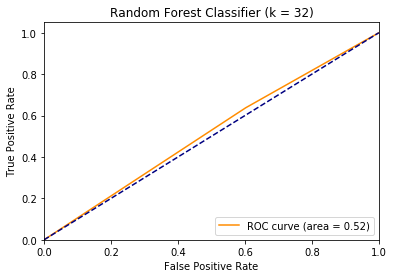

In [201]:
class_random_forest(new_df, 'marks', 5, 1, 100)